# Exploratory Data Analysis (EDA)
## Crypto Volatility Detection - Milestone 2

This notebook performs EDA on the computed features to:
1. Understand feature distributions
2. Set volatility spike threshold using percentile plots
3. Analyze feature relationships


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")


Libraries imported successfully


In [3]:
# Load features
features_path = Path("../data/processed/features.parquet")

if not features_path.exists():
    print("ERROR: No features file found. Please run featurizer.py or replay.py first.")
else:
    df = pd.read_parquet(features_path)
    print(f"Loaded {len(df)} feature records from {features_path}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nData shape: {df.shape}")
    print(f"\nFirst few rows:")
    display(df.head())


Loaded 33881 feature records from ../data/processed/features.parquet

Columns: ['ts', 'midprice_return_mean', 'midprice_return_std', 'bid_ask_spread', 'trade_intensity', 'order_book_imbalance', 'window_size', 'window_duration', 'pair', 'raw_price']

Data shape: (33881, 10)

First few rows:


,ts,midprice_return_mean,midprice_return_std,bid_ask_spread,trade_intensity,order_book_imbalance,window_size,window_duration,pair,raw_price
0,1.762932e+09,0.0,0.0,0.01,1.041668,9.664425e-08,2,1.919997,BTC-USD,103472.28
1,1.762932e+09,0.0,0.0,0.01,0.345702,9.664425e-08,3,8.677997,BTC-USD,103472.28
2,1.762932e+09,0.0,0.0,0.01,0.438733,9.664425e-08,4,9.117160,BTC-USD,103472.27
3,1.762932e+09,0.0,0.0,0.01,0.511067,9.664425e-08,5,9.783446,BTC-USD,103472.27
4,1.762932e+09,0.0,0.0,0.01,0.586640,9.664425e-08,6,10.227737,BTC-USD,103472.28


In [4]:
# Basic statistics
print("Basic Statistics:")
display(df.describe())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())


Basic Statistics:


,ts,midprice_return_mean,midprice_return_std,bid_ask_spread,trade_intensity,order_book_imbalance,window_size,window_duration,raw_price
count,3.388100e+04,3.388100e+04,33881.000000,33881.000000,33881.000000,3.388100e+04,33881.000000,33881.000000,33881.000000
mean,1.763095e+09,6.219451e-08,0.000023,5.770538,21.959352,5.942905e-05,1236.711225,55.548735,97408.411423
std,1.399034e+04,1.922359e-06,0.000005,2.867578,13.612998,2.984518e-05,835.367072,12.022704,1120.299983
min,1.762932e+09,-6.122661e-05,0.000000,0.010000,0.345702,9.664425e-08,2.000000,0.012122,95900.940000
25%,1.763082e+09,-1.143161e-06,0.000020,3.588721,12.912957,3.650339e-05,730.000000,59.527872,96484.180000
50%,1.763103e+09,-2.558320e-07,0.000023,5.040102,16.871770,5.186980e-05,936.000000,59.814675,97026.750000
75%,1.763103e+09,1.429203e-06,0.000026,7.392354,28.319014,7.645000e-05,1532.000000,59.936871,98742.240000
max,1.763104e+09,2.450483e-05,0.000041,13.059683,299.112426,1.356751e-04,3948.000000,59.999994,103472.300000



Data types:
ts                      float64
midprice_return_mean    float64
midprice_return_std     float64
bid_ask_spread          float64
trade_intensity         float64
order_book_imbalance    float64
window_size               int64
window_duration         float64
pair                     object
raw_price               float64
dtype: object

Missing values:
ts                      0
midprice_return_mean    0
midprice_return_std     0
bid_ask_spread          0
trade_intensity         0
order_book_imbalance    0
window_size             0
window_duration         0
pair                    0
raw_price               0
dtype: int64


## Feature Distributions


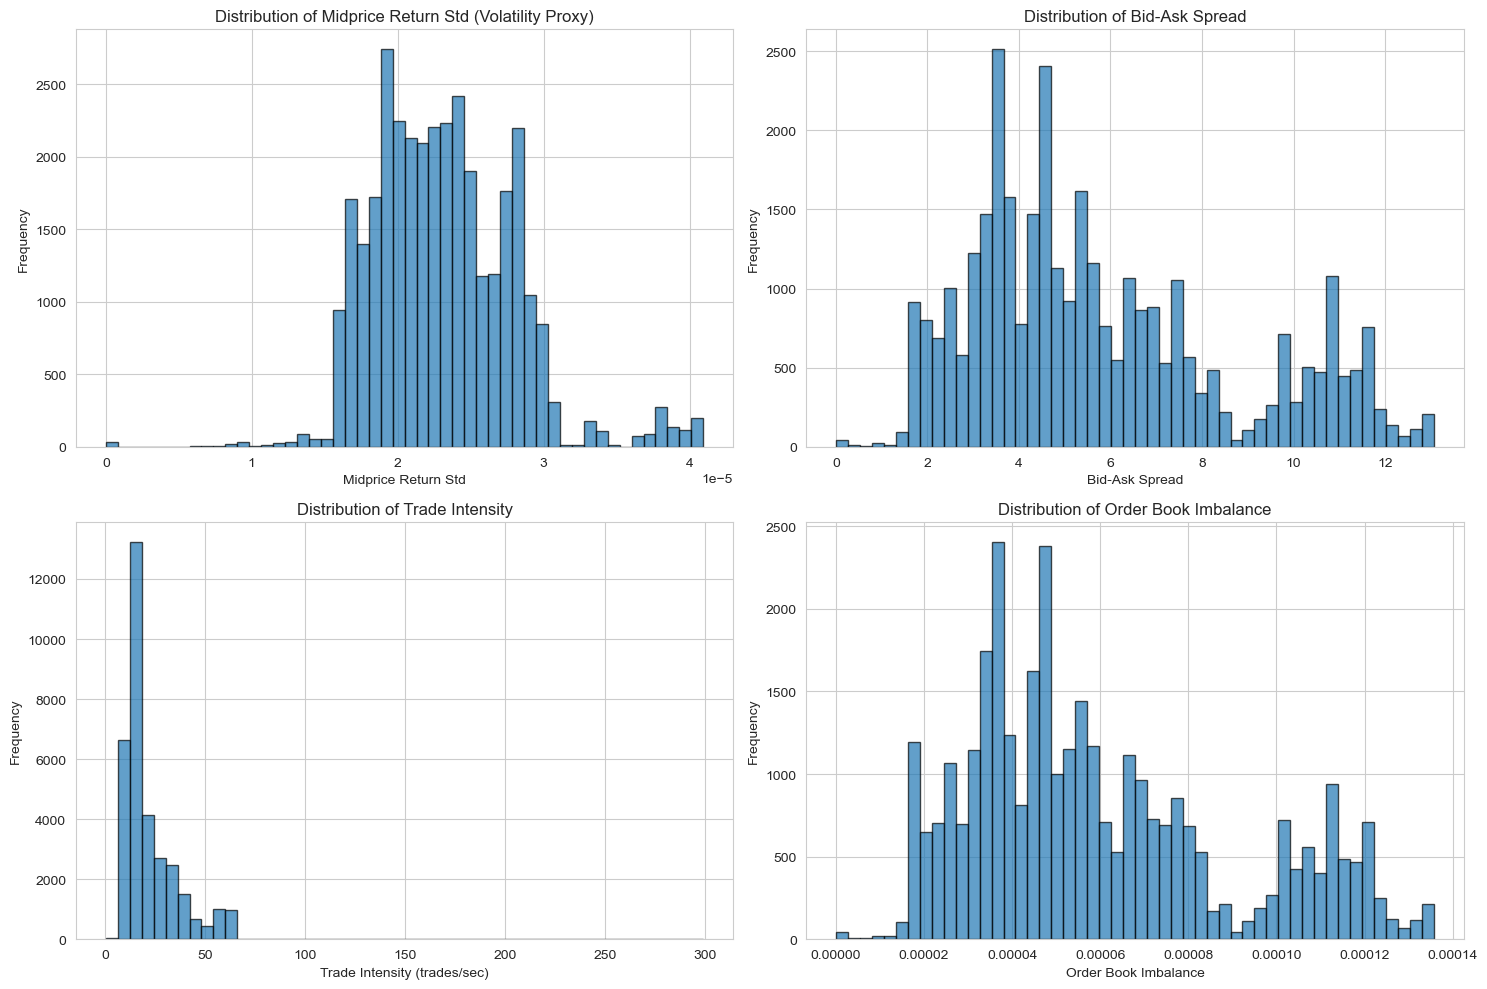

In [5]:
# Plot distributions of key features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Midprice return std (volatility proxy)
axes[0, 0].hist(df['midprice_return_std'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Midprice Return Std (Volatility Proxy)')
axes[0, 0].set_xlabel('Midprice Return Std')
axes[0, 0].set_ylabel('Frequency')

# Bid-ask spread
axes[0, 1].hist(df['bid_ask_spread'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Bid-Ask Spread')
axes[0, 1].set_xlabel('Bid-Ask Spread')
axes[0, 1].set_ylabel('Frequency')

# Trade intensity
axes[1, 0].hist(df['trade_intensity'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Trade Intensity')
axes[1, 0].set_xlabel('Trade Intensity (trades/sec)')
axes[1, 0].set_ylabel('Frequency')

# Order book imbalance
axes[1, 1].hist(df['order_book_imbalance'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Order Book Imbalance')
axes[1, 1].set_xlabel('Order Book Imbalance')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Percentile Analysis for Volatility Threshold


In [6]:
# Compute percentiles for midprice_return_std (our volatility proxy)
volatility_proxy = df['midprice_return_std']

percentiles = [50, 75, 90, 95, 99, 99.5, 99.9]
percentile_values = {p: np.percentile(volatility_proxy, p) for p in percentiles}

print("Percentiles of Midprice Return Std (Volatility Proxy):")
for p, v in percentile_values.items():
    print(f"  {p}th percentile: {v:.6f}")

# Display as DataFrame
percentile_df = pd.DataFrame([percentile_values]).T
percentile_df.columns = ['Value']
percentile_df.index.name = 'Percentile'
display(percentile_df)


Percentiles of Midprice Return Std (Volatility Proxy):
  50th percentile: 0.000023
  75th percentile: 0.000026
  90th percentile: 0.000029
  95th percentile: 0.000030
  99th percentile: 0.000039
  99.5th percentile: 0.000040
  99.9th percentile: 0.000041


,Value
Percentile,
50.0,0.000023
75.0,0.000026
90.0,0.000029
95.0,0.000030
99.0,0.000039
99.5,0.000040
99.9,0.000041


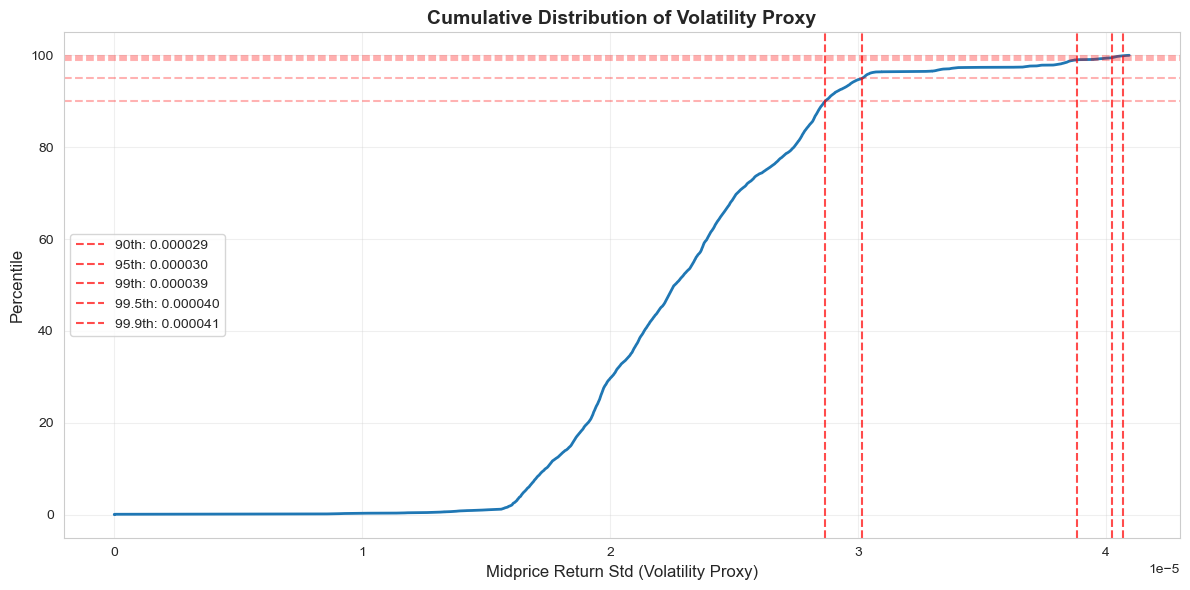

In [7]:
# Percentile plot (CDF - Cumulative Distribution Function)
sorted_vol = np.sort(volatility_proxy)
percentiles_plot = np.arange(1, len(sorted_vol) + 1) / len(sorted_vol) * 100

plt.figure(figsize=(12, 6))
plt.plot(sorted_vol, percentiles_plot, linewidth=2)
plt.xlabel('Midprice Return Std (Volatility Proxy)', fontsize=12)
plt.ylabel('Percentile', fontsize=12)
plt.title('Cumulative Distribution of Volatility Proxy', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Mark key percentiles
for p, v in percentile_values.items():
    if p >= 90:  # Only show high percentiles
        plt.axvline(v, color='red', linestyle='--', alpha=0.7, label=f'{p}th: {v:.6f}')
        plt.axhline(p, color='red', linestyle='--', alpha=0.3)

plt.legend()
plt.tight_layout()
plt.show()


95th percentile: 1695 samples (5.00%) would be labeled as spikes
99th percentile: 339 samples (1.00%) would be labeled as spikes
99.5th percentile: 170 samples (0.50%) would be labeled as spikes


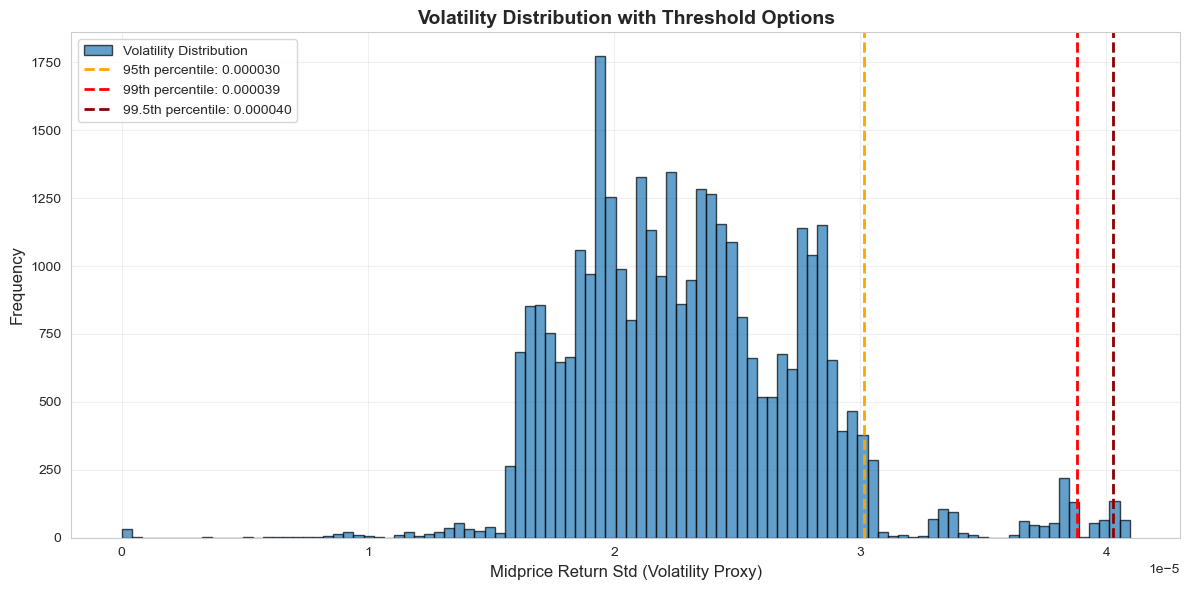

In [8]:
# Visualize different threshold options
threshold_options = {
    '95th percentile': percentile_values[95],
    '99th percentile': percentile_values[99],
    '99.5th percentile': percentile_values[99.5]
}

plt.figure(figsize=(12, 6))
plt.hist(volatility_proxy, bins=100, edgecolor='black', alpha=0.7, label='Volatility Distribution')

colors = ['orange', 'red', 'darkred']
for i, (label, threshold) in enumerate(threshold_options.items()):
    plt.axvline(threshold, color=colors[i], linestyle='--', linewidth=2, 
                label=f'{label}: {threshold:.6f}')
    
    # Count how many samples would be labeled as spikes
    spike_count = (volatility_proxy >= threshold).sum()
    spike_pct = (spike_count / len(volatility_proxy)) * 100
    print(f"{label}: {spike_count} samples ({spike_pct:.2f}%) would be labeled as spikes")

plt.xlabel('Midprice Return Std (Volatility Proxy)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Volatility Distribution with Threshold Options', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [9]:
# Final threshold selection (update based on your analysis)
# Using 95th percentile for better class distribution across train/val/test splits
# Updated from 99th percentile (0.000034) which was too strict (0.2% positive examples)
CHOSEN_THRESHOLD = percentile_values[95]
CHOSEN_THRESHOLD_PERCENTILE = 95

print(f"\n{'='*60}")
print(f"CHOSEN THRESHOLD")
print(f"{'='*60}")
print(f"Threshold τ: {CHOSEN_THRESHOLD:.6f}")
print(f"Percentile: {CHOSEN_THRESHOLD_PERCENTILE}th")
print(f"\nJustification:")
print(f"- This threshold captures the top {100 - CHOSEN_THRESHOLD_PERCENTILE}% of volatility events")
print(f"- {((volatility_proxy >= CHOSEN_THRESHOLD).sum() / len(volatility_proxy) * 100):.2f}% of samples will be labeled as spikes")
print(f"- 95th percentile chosen over 99th to ensure sufficient positive examples in validation and test sets")
print(f"- This provides a good balance between sensitivity and specificity for the available data volume")
print(f"{'='*60}")



CHOSEN THRESHOLD
Threshold τ: 0.000030
Percentile: 95th

Justification:
- This threshold captures the top 5% of volatility events
- 5.00% of samples will be labeled as spikes
- 95th percentile chosen over 99th to ensure sufficient positive examples in validation and test sets
- This provides a good balance between sensitivity and specificity for the available data volume
